## Text project

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [2]:
#Load dataset
def load_data():
    data = pd.read_csv('./data/Tweets.csv')
    return data

In [3]:
tweet_df = load_data()
tweet_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)
tweet_df.info()

Dataset size: (14640, 15)
Columns are: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-

## Step 1 : take "text" column

In [7]:
tweet_df_minus = tweet_df['text']
tweet_df_minus[:5]

0                                                                    @VirginAmerica What @dhepburn said.
1                               @VirginAmerica plus you've added commercials to the experience... tacky.
2                                @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...
4                                                @VirginAmerica and it's a really big bad thing about it
Name: text, dtype: object


## Step 2: Data Preprocessing

We will perform the following steps: 

1. **Tokenization** : Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
2. Words that have fewer than 3 characters are removed.
3. All **stopwords** are removed.
4. Words are **lemmatized** - words in third person are changed to first person and verbs in past and future tenses are changed into present.
5. Words are **stemmed** - words are reduced to their root form.



In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lbenboudiaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
Words_deleted_length = 3
Lemmatized = True
Stemmed = False

import pandas as pd
stemmer = SnowballStemmer("english")

'''
Write a function to perform the pre processing steps on the entire dataset
'''
def lemmatize_stemming(text):
    if(Lemmatized & Stemmed):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
    if(Stemmed):
        return stemmer.stem(text)
    if(Lemmatized):
        return WordNetLemmatizer().lemmatize(text, pos='v')
    return text

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > Words_deleted_length:
            result.append(lemmatize_stemming(token))
            
    return result

In [11]:
'''We create two lists, one for pre-processed data and an other for not pre-processed data'''
processed_docs = []
nan_processed_docs = []
for doc in tweet_df_minus :
    nan_processed_docs.append(doc)
for doc in tweet_df_minus :
    processed_docs.append(preprocess(doc))
    

'''They should have the same size''' 
print('Size of not pre-processeded data : ', len(nan_processed_docs))
print('Size of pre-processeded data : ', len(processed_docs))
print('\nCheck data processing effect:')
print(nan_processed_docs[1])
print(processed_docs[1])

Size of not pre-processeded data :  14640
Size of pre-processeded data :  14640

Check data processing effect:
@VirginAmerica plus you've added commercials to the experience... tacky.
['virginamerica', 'plus', 'add', 'commercials', 'experience', 'tacky']


## Step 3: Bag of words on the dataset

Now let's create a dictionary from 'processed_docs' containing the number of times a word appears in the training set. To do that, let's pass processed_docs to gensim.corpora.Dictionary() and call it 'dictionary'.


In [12]:
'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
dictionary = gensim.corpora.Dictionary(processed_docs)
print(dictionary)

Dictionary(9775 unique tokens: ['verizonwireless', 'ferry', 'maui', 'crâpe', 'tiredcustomer']...)


In [13]:
'''
Checking dictionary created
'''
count = 1
for k, v in dictionary.iteritems():
    print('Word_id:', k ,'Word:',v)
    count += 1
    if count > 10:
        break

Word_id: 1403 Word: verizonwireless
Word_id: 4582 Word: ferry
Word_id: 2494 Word: maui
Word_id: 4655 Word: crâpe
Word_id: 3894 Word: tiredcustomer
Word_id: 1371 Word: will
Word_id: 502 Word: priority
Word_id: 791 Word: virginatlantic
Word_id: 5766 Word: whoot
Word_id: 5145 Word: qxteqzm


In [14]:
'''
Create the Bag-of-words model for each document i.e. for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print('The representation is a tuple : (word_id, word_frequency) for example : \n')
print(processed_docs[:2])
bow_corpus[:2]

The representation is a tuple : (word_id, word_frequency) for example : 

[['virginamerica', 'dhepburn', 'say'], ['virginamerica', 'plus', 'add', 'commercials', 'experience', 'tacky']]


[[(0, 1), (1, 1), (2, 1)], [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]

In [15]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 2 ("virginamerica") appears 1 time.
Word 24 ("seat") appears 1 time.
Word 28 ("time") appears 1 time.
Word 88 ("available") appears 1 time.
Word 89 ("carriers") appears 1 time.
Word 90 ("fare") appears 1 time.
Word 91 ("select") appears 1 time.


## Step 4: Running LDA using Bag of Words
We are going for 10 topics in the document corpus.

We will be running LDA using all CPU cores to parallelize and speed up model training.

Some of the parameters we will be tweaking are:

1. **num_topics** is the number of requested latent topics to be extracted from the training corpus.
2. **id2word** is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.
3. **workers** is the number of extra processes to use for parallelization. Uses all available cores by default.
4. **alpha** and **beta** are hyperparameters that affect sparsity of the document-topic (theta) and topic-word (lambda) distributions. We will let these be the default values for now(default value is 1/num_topics)

 **Alpha** is the per document topic distribution.
   - *High alpha* : Every document has a mixture of all topics(documents appear similar to each other).
   - *Low alpha* : Every document has a mixture of very few topics

  **bEta** is the per topic word distribution.
    - *High beta* : Each topic has a mixture of most words(topics appear similar to each other).
    - *Low eta* : Each topic has a mixture of few words.

5. **passes** is the number of training passes through the corpus. For example, if the training corpus has 50,000 documents, chunksize is 10,000, passes is 2, then online training is done in 10 updates:
- documents 0-9,999
- documents 10,000-19,999
- documents 20,000-29,999
- documents 30,000-39,999
- documents 40,000-49,999
- documents 0-9,999
- documents 10,000-19,999
- documents 20,000-29,999
- documents 30,000-39,999
- documents 40,000-49,999


In [309]:
# LDA multicore 
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
lda_model =  gensim.models.LdaMulticore(corpus=bow_corpus, 
                                   num_topics = 2,
                                   chunksize=100,
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [19]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.047*"seat" + 0.022*"good" + 0.016*"appreciate" + 0.015*"hope" + 0.013*"class" + 0.012*"like" + 0.012*"available" + 0.011*"upgrade" + 0.011*"busy" + 0.010*"unacceptable"


Topic: 1 
Words: 0.028*"people" + 0.021*"agents" + 0.018*"staff" + 0.015*"rude" + 0.014*"american" + 0.012*"southwestair" + 0.011*"tweet" + 0.011*"delta" + 0.011*"point" + 0.011*"money"


Topic: 2 
Words: 0.139*"americanair" + 0.073*"flight" + 0.049*"usairways" + 0.022*"thank" + 0.021*"cancel" + 0.017*"help" + 0.014*"service" + 0.013*"hold" + 0.013*"wait" + 0.013*"hours"


Topic: 3 
Words: 0.082*"jetblue" + 0.069*"http" + 0.035*"airport" + 0.020*"speak" + 0.018*"right" + 0.016*"care" + 0.010*"airways" + 0.009*"load" + 0.008*"desk" + 0.008*"free"


Topic: 4 
Words: 0.043*"plane" + 0.040*"tell" + 0.020*"issue" + 0.020*"travel" + 0.018*"look" + 0.017*"board" + 0.014*"stick" + 0.012*"info" + 0.011*"land" + 0.010*"like"




## Step 5: Testing LDA model

In [310]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.25787951912715895


Now that we have the baseline coherence score for the default LDA model, let’s perform a series of sensitivity tests to help determine the following model hyperparameters:

    Number of Topics (K)
    Dirichlet hyperparameter alpha: Document-Topic Density
    Dirichlet hyperparameter beta: Word-Topic Density
We’ll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two different validation corpus sets. We’ll use **C_v** as our choice of metric for performance comparison

We create function ***compute_coherence_values*** and iterate it over the range of topics, alpha, and beta parameter values

In [17]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [81]:
import tqdm

grid = {} 
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bow_corpus, num_of_docs*0.75), 
               bow_corpus]

corpus_title = ['75% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run ~ 30mins
if 1 == 1:
    pbar = tqdm.tqdm(total=20)
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    pbar.update(1)
    pbar.close()



  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:42<13:18, 42.02s/it]

23it [51:04, 133.25s/it]1:25<12:44, 42.48s/it]
  0%|          | 0/20 [23:41<?, ?it/s]


 15%|█▌        | 3/20 [02:11<12:19, 43.50s/it]

 20%|██        | 4/20 [02:52<11:25, 42.82s/it]

 25%|██▌       | 5/20 [03:35<10:41, 42.76s/it]

 30%|███       | 6/20 [04:14<09:43, 41.69s/it]

 35%|███▌      | 7/20 [05:04<09:35, 44.23s/it]

 40%|████      | 8/20 [05:49<08:52, 44.38s/it]

 45%|████▌     | 9/20 [06:28<07:50, 42.81s/it]

 50%|█████     | 10/20 [07:12<07:12, 43.29s/it]

 55%|█████▌    | 11/20 [07:59<06:37, 44.16s/it]

 60%|██████    | 12/20 [08:45<05:59, 44.96s/it]

 65%|██████▌   | 13/20 [09:22<04:56, 42.29s/it]

 70%|███████   | 14/20 [10:01<04:08, 41.34s/it]

 75%|███████▌  | 15/20 [10:45<03:31, 42.36s/it]

 80%|████████  | 16/20 [11:32<02:54, 43.52s/it]

 85%|████████▌ | 17/20 [12:25<02:19, 46.60s/it]

 90%|█████████ | 18/20 [13:06<01:29, 44.80s/it]

 95%|█████████▌| 19/20 [13:34<00:39, 39.89s/i

OSError: [Errno 12] Cannot allocate memory

In [179]:
test_results = pd.read_csv('lda_tests_results.csv')
df = pd.DataFrame()

null_ = test_results['Validation_Set'] != 'Validation_Set'
null_alpha = test_results['Alpha'] != 'Alpha'
null_beta = test_results['Beta'] != 'Beta'
null_corpus = test_results['Topics'] != 'Topics'
null_cv = test_results['Coherence'] != 'Coherence'

df['Validation'] = test_results['Validation_Set'][null_] 
df['topics'] = test_results['Topics'][null_corpus]
df['coherence'] = test_results['Coherence'][null_cv]
df['alpha'] = test_results['Alpha'][null_alpha]
df['beta'] = test_results['Beta'][null_beta]

pd.DataFrame(df).to_csv('lda_tests_results2.csv', index=False)

In [312]:
np.max(df['coherence'])

'0.5266114704724331'

In [313]:
df.loc[df['coherence'] == '0.5266114704724331']

,Validation,topics,coherence,alpha,beta
714,75% Corpus,10,0.5266114704724331,0.31,0.61


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

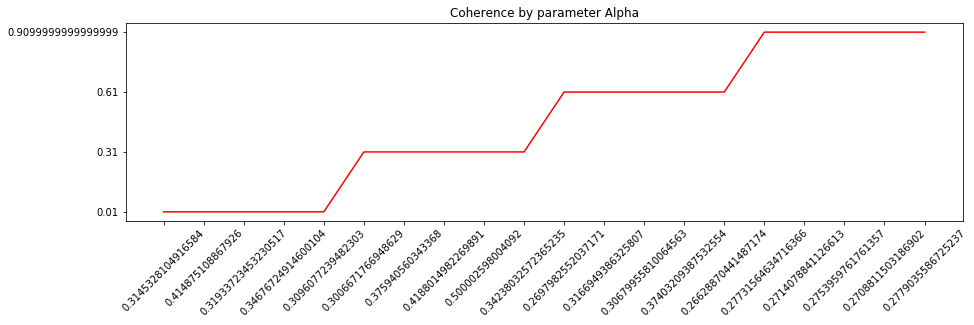

In [177]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)

ax1.plot(df['coherence'][0:20],df.alpha[0:20], c='red')
#ax2.plot(df['coherence'][0:30],df.beta[0:30] !='symmetric', c='red')

ax1.set_title('Coherence by parameter Alpha')
#ax2.set_title('Coherence by parameter Beta')
plt.xticks(rotation=45)

In [319]:
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.31,
                                           eta=0.9)

In [315]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.033*"seat" + 0.024*"americanair" + 0.022*"unite" + 0.014*"customers" + 0.012*"airline" + 0.010*"airlines" + 0.010*"worst" + 0.009*"upgrade" + 0.009*"class" + 0.008*"service"


Topic: 1 
Words: 0.048*"southwestair" + 0.043*"americanair" + 0.031*"thank" + 0.023*"usairways" + 0.021*"flight" + 0.015*"unite" + 0.014*"jetblue" + 0.012*"help" + 0.008*"book" + 0.008*"need"


Topic: 2 
Words: 0.028*"hang" + 0.011*"kid" + 0.010*"southwest" + 0.007*"list" + 0.006*"https" + 0.005*"storm" + 0.005*"bump" + 0.005*"easy" + 0.005*"husband" + 0.004*"choice"


Topic: 3 
Words: 0.009*"possible" + 0.009*"wifi" + 0.006*"plus" + 0.005*"meet" + 0.004*"absolutely" + 0.004*"expire" + 0.004*"baby" + 0.004*"page" + 0.004*"mind" + 0.004*"yall"


Topic: 4 
Words: 0.013*"wasn" + 0.008*"award" + 0.007*"fault" + 0.006*"reps" + 0.005*"hate" + 0.003*"deserve" + 0.003*"simply" + 0.003*"total" + 0.002*"step" + 0.002*"game"


Topic: 5 
Words: 0.114*"jetblue" + 0.034*"http" + 0.021*"service" + 0.019*"cust

In [320]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5423622593233143


## Step 6: create T_e_i an input to have $t_{ei}$ after apply Doc2Vec 

In [297]:
list_topics=lda_model.show_topics(formatted=False)
list_topics 

topic = []
T_e_i = []
for tup in list_topics:
    topic = []
    for tup2 in tup[1]:
        topic.append(tup2[0])
    T_e_i.append(topic) 

## Step 7 : Train Doc2Vec on non-pre-processed data "nan_processed_docs"


In [298]:
import smart_open
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
def read(fname):
    for i, line in enumerate(f):
        tokens = fname[i]
        yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [299]:
train_nan_processed_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(nan_processed_docs)]

In [300]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(train_nan_processed_docs)
model.train(train_nan_processed_docs, total_examples=len(nan_processed_docs), epochs=model.epochs)

## Step 8 : Apply Doc2Vec on each document in your data to form $d_{ei}$

In [302]:
Liste_D_e_i = []
Liste_of_n_docs = processed_docs
for i in range(len(Liste_of_n_docs)):
    vector = []
    vector = model.infer_vector(Liste_of_n_docs[i])
    Liste_D_e_i.append(vector) 

## Step 9 : Apply Doc2Vec on your topics to form $t_{ei}$

In [304]:
Liste_T_e_i = []
for i in range(len(T_e_i)):
    vector = []
    vector = model.infer_vector(T_e_i[i])
    Liste_T_e_i.append(vector) 

## Step 9 : Calculate the similarity between every pair $d_{ei}$ and $t_{ei}$

In [322]:
from scipy import spatial
similairty = []
temp=[]
for i in range(len(Liste_D_e_i)):
    for j in range(len(Liste_T_e_i)):
        temp.append(spatial.distance.cosine(Liste_D_e_i[i], Liste_T_e_i[j]))
    similairty.append(temp.index(min(temp)))
    temp.clear()

In [326]:
print(np.mean(similairty))

4.567144808743169


## Step 10 : Graph

In [321]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

/home/lbenboudiaf/.local/lib/python3.5/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      31.686459        1       1  0.259685  0.122439
1      27.423012        1       2  0.228998 -0.133049
5       8.961208        1       3 -0.016731 -0.014083
3       7.180384        1       4 -0.074251 -0.012479
0       5.620594        1       5 -0.068939  0.007643
9       4.317032        1       6 -0.070407  0.009785
4       3.988688        1       7 -0.065795  0.005803
2       3.888993        1       8 -0.065811  0.003529
6       3.496722        1       9 -0.063582  0.005288
8       3.436912        1      10 -0.063167  0.005125, topic_info=     Category         Freq           Term        Total  loglift  logprob
2887  Default  3381.000000         flight  3381.000000  30.0000  30.0000
6284  Default  1193.000000        jetblue  1193.000000  29.0000  29.0000
3956  Default  3586.000000    americanair  3586.000000  28.0000  28.0000
1811  Default   536.000000        service   536.000000  27.0000  27.0000
9224  Default  1052.000000   southwestair  1052.000000  26.0000  26.0000
9442  Default  1042.000000          thank  1042.000000  25.0000  25.0000
4396  Default   546.000000           http   546.000000  24.0000  24.0000
1025  Default   407.000000       customer   407.000000  23.0000  23.0000
7345  Default   842.000000         cancel   842.000000  22.0000  22.0000
8001  Default  2387.000000      usairways  2387.000000  21.0000  21.0000
5839  Default   636.000000          delay   636.000000  20.0000  20.0000
3461  Default  1331.000000          unite  1331.000000  19.0000  19.0000
4871  Default   193.000000        airline   193.000000  18.0000  18.0000
8474  Default   516.000000          hours   516.000000  17.0000  17.0000
6485  Default   549.000000           wait   549.000000  16.0000  16.0000
3286  Default   435.000000          plane   435.000000  15.0000  15.0000
6025  Default   408.000000      flightled   408.000000  14.0000  14.0000
6074  Default   700.000000           help   700.000000  13.0000  13.0000
8600  Default   364.000000           gate   364.000000  12.0000  12.0000
3556  Default   120.000000          worst   120.000000  11.0000  11.0000
318   Default   359.000000          phone   359.000000  10.0000  10.0000
7485  Default   346.000000           hour   346.000000   9.0000   9.0000
1307  Default    98.000000           come    98.000000   8.0000   8.0000
873   Default   285.000000           work   285.000000   7.0000   7.0000
6186  Default   273.000000            guy   273.000000   6.0000   6.0000
5508  Default   305.000000           late   305.000000   5.0000   5.0000
7667  Default   285.000000           know   285.000000   4.0000   4.0000
2076  Default   124.000000     experience   124.000000   3.0000   3.0000
2064  Default    79.000000           best    79.000000   2.0000   2.0000
1411  Default   618.000000           time   618.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
5642  Topic10    12.356038          serve    17.365788   3.0302  -5.7461
2725  Topic10    11.253632        funeral    16.224695   3.0048  -5.8396
2623  Topic10     7.634927         sister    12.673221   2.8638  -6.2275
7481  Topic10     5.155413         create     9.973606   2.7107  -6.6202
2679  Topic10     4.933500      certainly     9.612566   2.7036  -6.6642
8204  Topic10     5.537667           size    10.810652   2.7016  -6.5487
3332  Topic10     4.018714           star     8.427653   2.6300  -6.8693
7759  Topic10     4.352331           cell     9.397692   2.6008  -6.7895
5565  Topic10     3.842855            die     8.357676   2.5936  -6.9140
3623  Topic10     4.379903           fund     9.926193   2.5524  -6.7832
4969  Topic10     4.525511          cheap    10.615757   2.5180  -6.7505
9398  Topic10     3.536830         attend     8.499269   2.4938  -6.9970
7313  Topic10     3.203455         circle     7.825272   2.4775  -7.0960
3952  Topic10     3.2924